<a href="https://colab.research.google.com/github/Roja4220-kits/Employee_Turnover_Prediction-/blob/main/Employee_Turnover_Prediction_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

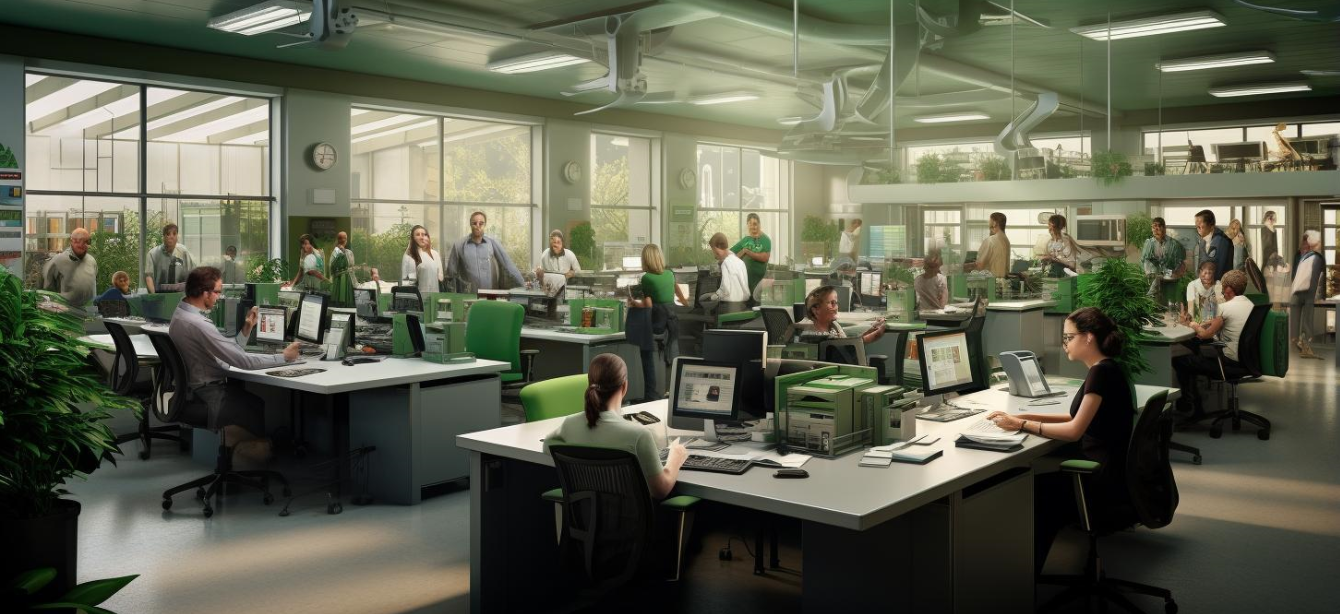

#**Problem**:
 Employee turnover is a significant challenge for many organizations. It is costly in terms of both lost productivity and the expenses associated with recruiting, hiring, and training new employees. Understanding and predicting which employees are at risk of leaving can help an organization to take proactive steps to retain valuable employees and maintain organizational stability. In this project, we will use a dataset containing information about employees and whether or not they left the company. Our task is to build a model that can predict the probability that a given employee will leave the company. We will approach this binary classification problem using regression algorithms for reasons such as probabilistic interpretation, threshold calibration, and better performance on imbalanced data.

#**Objectives**:
**>>Dataset Overview**: Understand the basic information, summary statistics for numerical and categorical variables.

**>>Conduct Extensive Exploratory Data Analysis (EDA):**
Analyze the distribution of numerical features against the target variable.
Analyze the distribution of categorical features against the target variable.

**>>Data Preprocessing:**
Check for missing values.
Encode categorical features.

**>>Model Building:**
Define Random forest  and Decisions tree algorithms.
Tune the hyperparameters for both models to achieve the best performance.
Evaluate the performance of both models using regression metrics like MAE, MSE, RMSE, and R2 Score.

**>>Conclusion:** Summarize the findings, compare the

performance of the models.

# **Table of contents:**

>[Problem:](#scrollTo=8j2Ho0EGhZVD)

>[Objectives:](#scrollTo=PGUSdd3Uj0GW)

>[1.Required libraries](#scrollTo=NooDW83T25Ro)

>[2.Load the dataset](#scrollTo=0h5URR7v6SCR)

>[3.Data preprocessing & Feature selection](#scrollTo=0u1f3oDS6z3A)

>[>>Overview of data](#scrollTo=1Db1qbrEmucK)

>[>>Data cleaning,Fillinging missing values,Noisy data,Removal of outliers](#scrollTo=wJZ5_HQ5nBzd)

>[>>Transforming Categorical variables into numeric variables(or vice versa)](#scrollTo=kQoRemhAKHOE)

>[4.Featuew selection & engineering](#scrollTo=amvoBvwQKy75)

>[5.Data Visualization](#scrollTo=Cv74teD1MFjU)

>[>>Bar Graphs](#scrollTo=arC2pM9ZwTsv)

>[>>Heatmap](#scrollTo=ZujW2JoOrlSS)

>[6.splittting & training](#scrollTo=bLpbk2NMWP4d)

>[7.Interactive Decision Tree Classfier](#scrollTo=QI0qgQg0oTbb)

>[>>Decision tree classifier](#scrollTo=iIB_dREbtlfa)

>[>>Random Forest Classifier](#scrollTo=CEXgp3DdtWyA)

>[>>Another way to train the model if accuracy is less](#scrollTo=wOATa4V8deuu)

>[8.Eveluate model on training data and test data](#scrollTo=-DC1YGP8uFqb)

>[9.Deploy the model](#scrollTo=uiGHfCUEu37H)

>[10.Prediction based on feedback data](#scrollTo=dNdpkdsIEAir)

>[11.Conclusion](#scrollTo=BeTPn2yTvIku)



#**1.Required libraries**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

#**2.Load the dataset**

In [ ]:
# Load the dataset
data = pd.read_csv('/content/HR.csv')

#**3.Data preprocessing & Feature selection**

# **>>Overview of data**

In [ ]:
data

satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2                       272                   4              0     1   
3                       223                   5              0     1   
4                       159                   3              0     1   
...                     ...                 ...            ...   ...   
14994                   151                   3              0     1   
14995                   160                   3              0     1   
14996                   143                   3              0     1   
14997                   280                   4              0     1   
14998                   158                   3              0     1   

       promotion_last_5years    sales  salary  
0                          0    sales     low  
1                          0    sales  medium  
2                          0    sales  medium  
3                          0    sales     low  
4                          0    sales     low  
...                      ...      ...     ...  
14994                      0  support     low  
14995                      0  support     low  
14996                      0  support     low  
14997                      0  support     low  
14998                      0  support     low  

[14999 rows x 10 columns]

In pandas, the **info()** method is a handy tool that provides a concise summary of a DataFrame. It offers valuable information about the DataFrame, such as:

**Data Types:** It shows the data type of each column, allowing you to quickly identify numerical, categorical, or other types of variables.

**Non-Null Values:** It displays the number of non-null values in each column, helping you identify missing data.

**Memory Usage:** It tells you how much memory the DataFrame is using, which can be helpful for optimizing performance, especially with large datasets.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


# **>>Data cleaning,Fillinging missing values,Noisy data,Removal of outliers**
**Data Cleaning**: This involves correcting inconsistencies, like different formats for the same data, removing duplicates, and fixing typos.

**Filling Missing Values**: Missing data can cause biases and inaccuracies in analysis. Filling these gaps using methods like imputation helps maintain the completeness of the dataset.

**Noisy Data**: Random errors or inconsistencies in the data are referred to as noise. Techniques like smoothing and binning can help reduce noise and improve data quality.

**Outliers**: Outliers are data points that significantly deviate from the rest of the data. They can distort analysis and model results. Identifying and handling outliers through methods like removal or transformation is crucial.
By performing these data preprocessing steps, you ensure that your data is accurate, consistent, and reliable, leading to more meaningful insights and better results in your data science projects.

In [ ]:
!pip install missingno

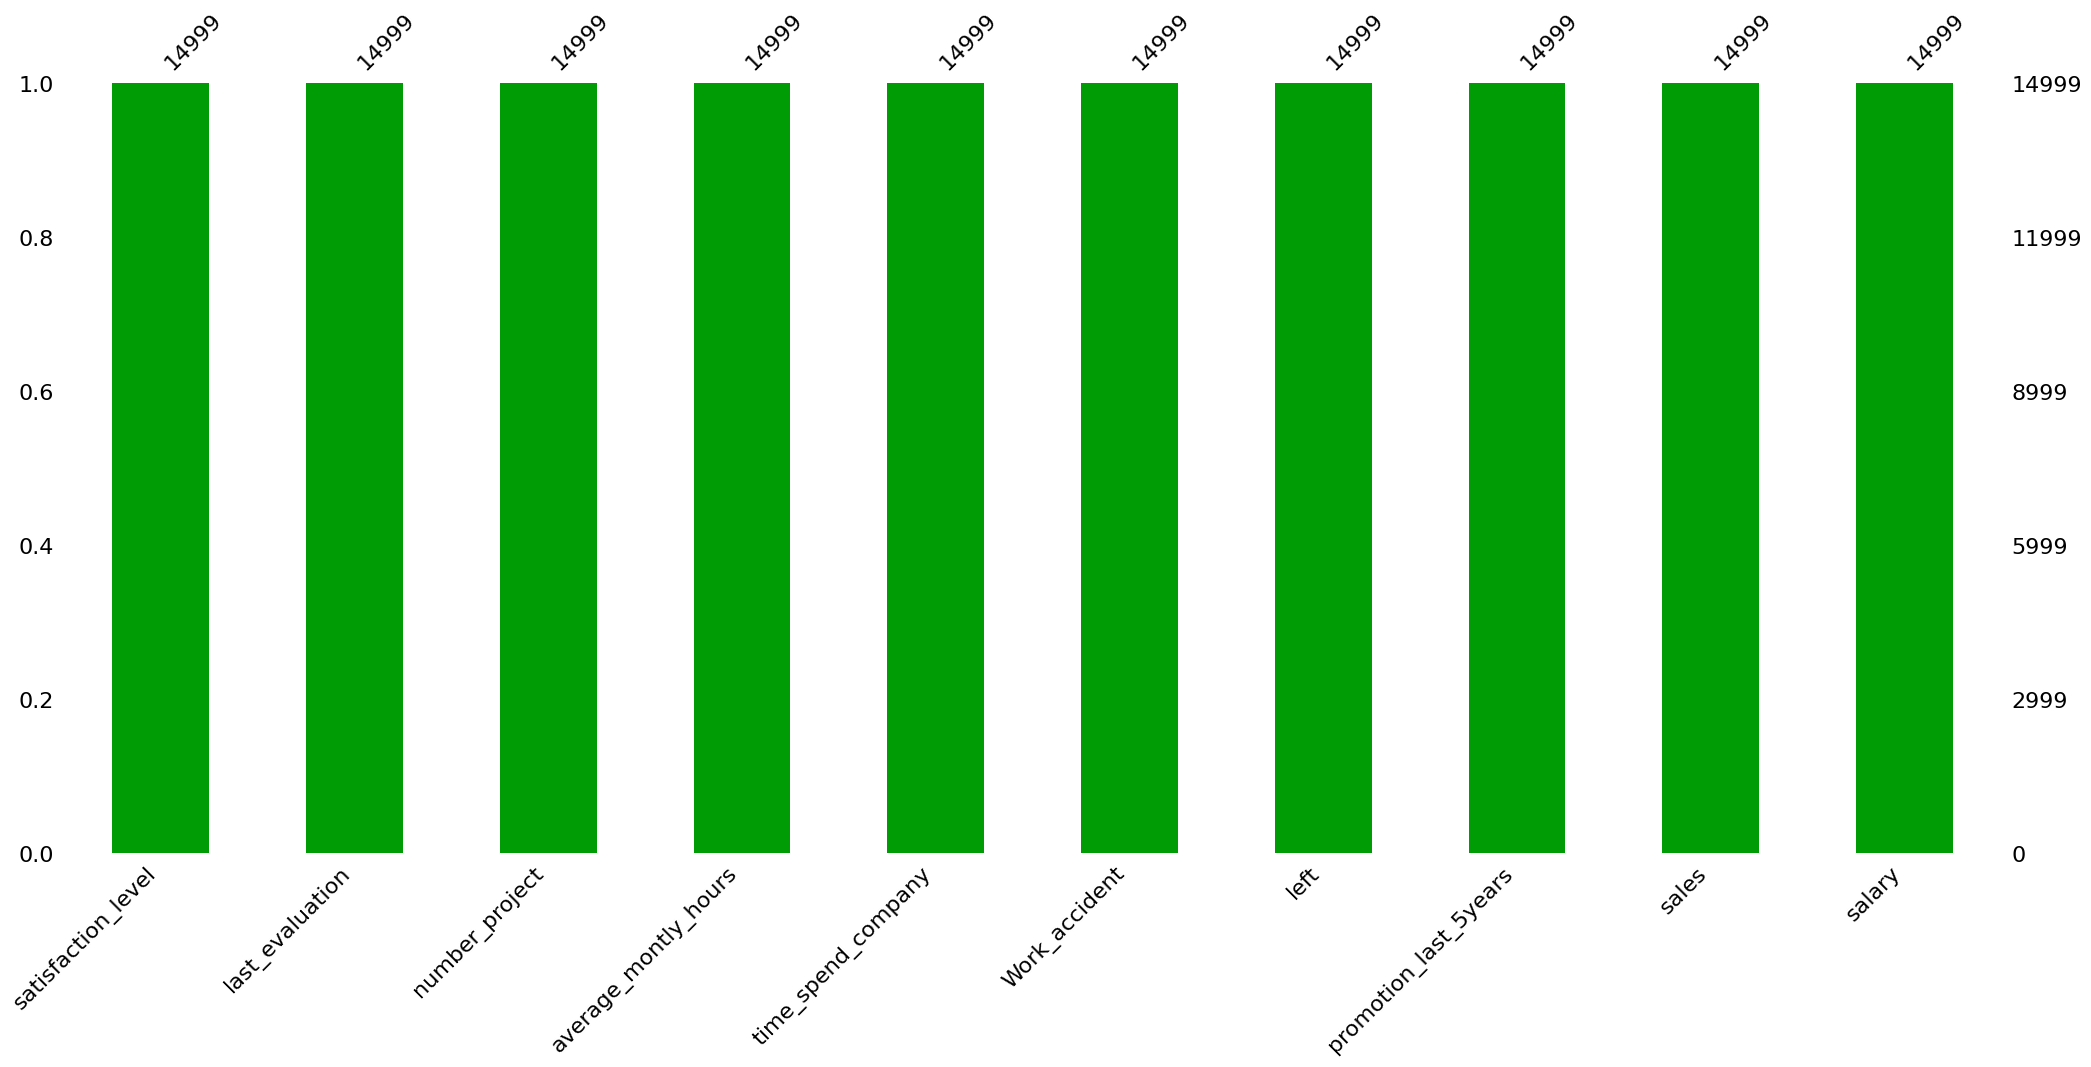

In [ ]:
import missingno as msno
import matplotlib.pyplot as plt # import the matplotlib library

# Data Cleaning
# Check for missing values
data.isnull().sum()

# Fill missing values with the mean for numerical columns
numerical_cols = data.select_dtypes(include=['number']).columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].mean())

# Generate the missing values matrix using missingno.bar()
msno.bar(data, color='#009c05')

# Display the plot
plt.show()

# Fill missing values with the mode for categorical columns
categorical_cols = data.select_dtypes(exclude=['number']).columns
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])

# Remove duplicates
data.drop_duplicates(inplace=True)

# Handling Noisy Data
# Example: Binning for 'Age'
if 'Age' in data.columns:
  data['Age'] = pd.cut(data['Age'], bins=5, labels=False)

# Removal of Outliers using IQR method
numerical_data = data.select_dtypes(include=['number'])
Q1 = numerical_data.quantile(0.25)
Q3 = numerical_data.quantile(0.75)
IQR = Q3 - Q1
data_cleaned = data[~((numerical_data < (Q1 - 1.5 * IQR)) | (numerical_data > (Q3 + 1.5 * IQR))).any(axis=1)]

#**>>Transforming Categorical variables into numeric variables(or vice versa)**
This code first uses one-hot encoding to transform the categorical features into numerical ones. Then, it uses binning to convert the numerical features into categorical ones.

In [ ]:
# Select categorical columns
categorical_cols = data_cleaned.select_dtypes(include=['object']).columns

# Apply one-hot encoding
data_encoded = pd.get_dummies(data_cleaned, columns=categorical_cols)


# Select numerical columns (excluding those already one-hot encoded)
numerical_cols = data_encoded.select_dtypes(include=['number']).columns
numerical_cols = [col for col in numerical_cols if col not in categorical_cols]

# Apply binning to convert numerical to categorical
for col in numerical_cols:
  data_encoded[col] = pd.cut(data_encoded[col], bins=5, labels=False)

#**4.Featuew selection & engineering**
This code performs feature selection using SelectKBest with f_classif to select the top 5 features based on ANOVA F-value between label/feature for classification tasks.

Additionally, it demonstrates feature engineering by creating an interaction term by multiplying satisfaction_level and last_evaluation.

Remember to replace "left" with the actual name of your target variable if it's different.

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Separate features (X) and target variable (y)
X = data_encoded.drop('left', axis=1)  # Assuming 'left' is the target variable
y = data_encoded['left']

# Apply SelectKBest for feature selection
selector = SelectKBest(f_classif, k=5)  # Select top 5 features
X_new = selector.fit_transform(X, y)

# Get the selected feature names
selected_features = X.columns[selector.get_support()]

# Check if required columns are present in selected features
required_features = ['satisfaction_level', 'last_evaluation']
for feature in required_features:
  if feature not in selected_features:
    print(f"Warning: {feature} not selected by SelectKBest. Interaction term will not be created.")

# Feature Engineering - Example: Creating interaction term (only if both features are available)
X_new = pd.DataFrame(X_new, columns=selected_features)
if all(item in selected_features for item in required_features):
  X_new['interaction_term'] = X_new['satisfaction_level'] * X_new['last_evaluation']

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:108: RuntimeWarning: invalid value encountered in divide
  msb = ssbn / float(dfbn)


# **5.Data Visualization**
Data visualization is a crucial aspect of data analysis and understanding for several reasons:

**Improved Understanding:** Visualizing data helps to grasp complex information quickly and easily. Patterns, trends, and outliers that might be hidden in raw data become apparent through visual representations.

**Effective Communication:** Visuals are a powerful way to communicate data insights to others. Charts and graphs can convey information more effectively than tables or text, making it easier for stakeholders to understand and engage with the data.

**Identifying Patterns and Trends:** Visualization helps to uncover hidden patterns, trends, and relationships in data that might not be obvious from numerical summaries alone.

**Data Exploration:** Visualizations aid in exploring data interactively. You can experiment with different chart types and views to gain a deeper understanding of the data's structure and characteristics.

**Supporting Decision-Making:** Visualizations provide a clear and concise way to present data, enabling informed decision-making based on insights derived from the data.

Overall, data visualization transforms raw data into meaningful insights, making it easier to understand, analyze, and communicate data effectively.

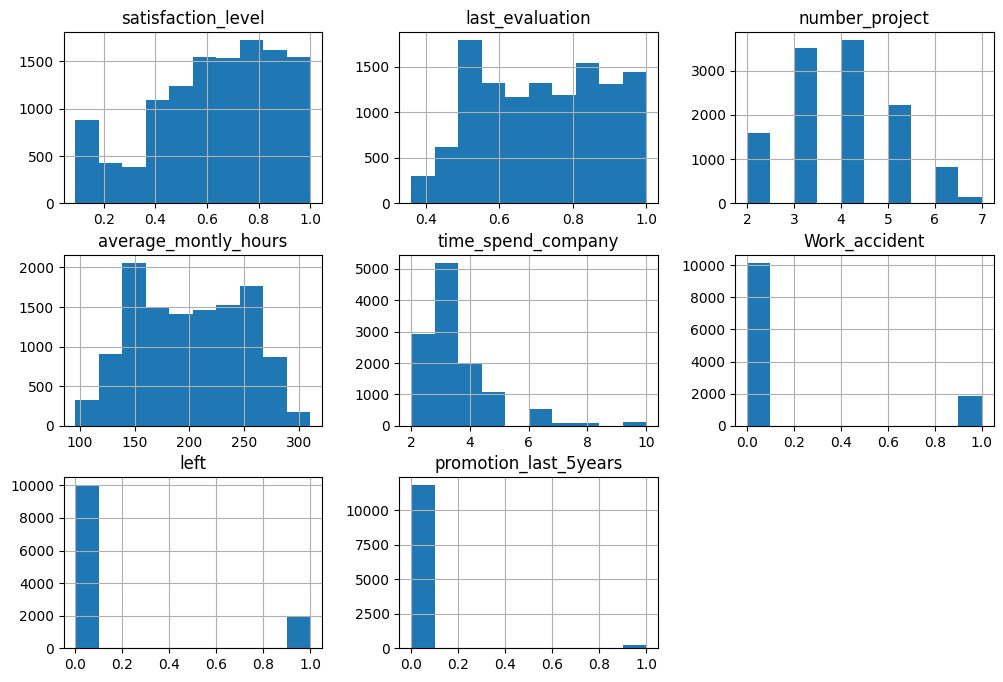

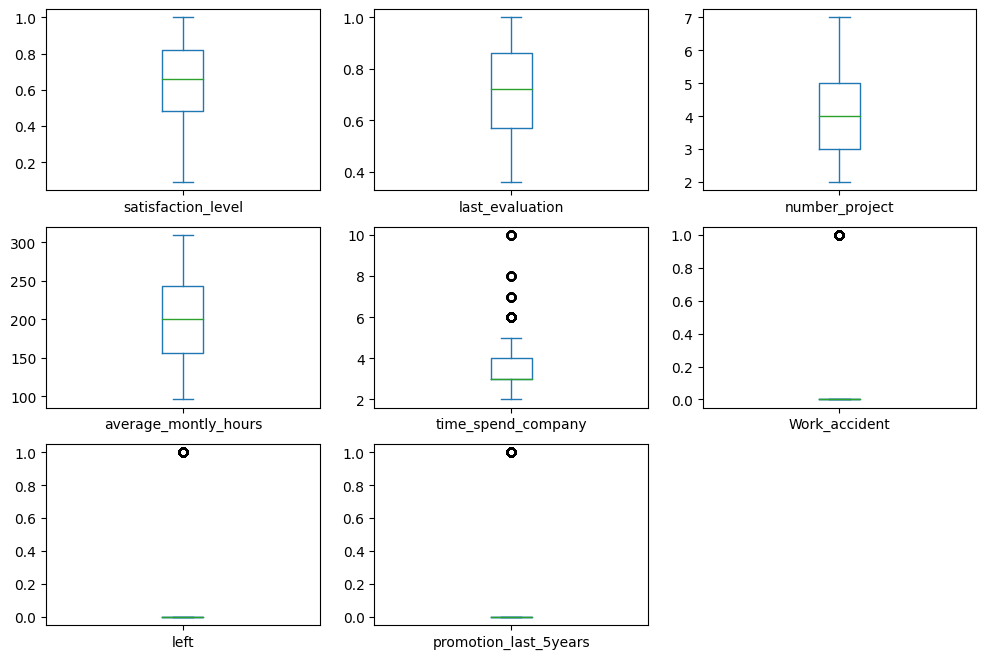

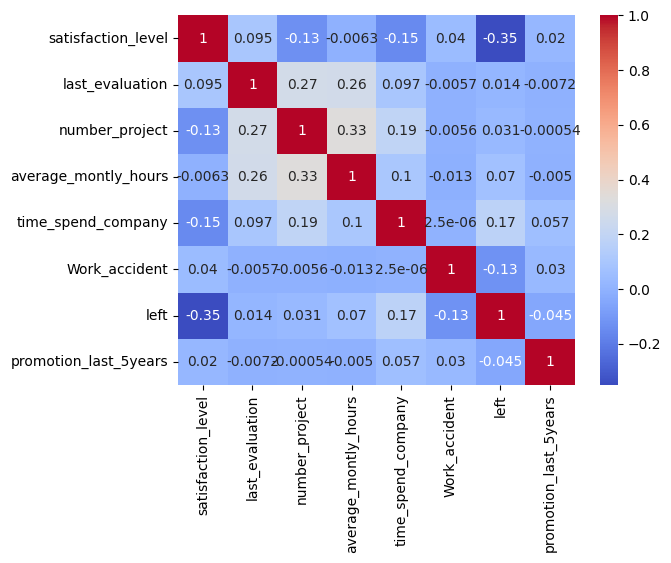

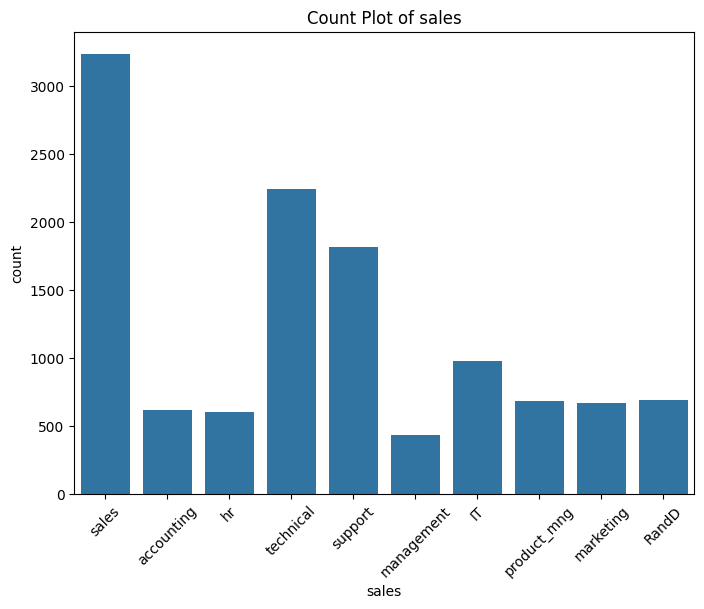

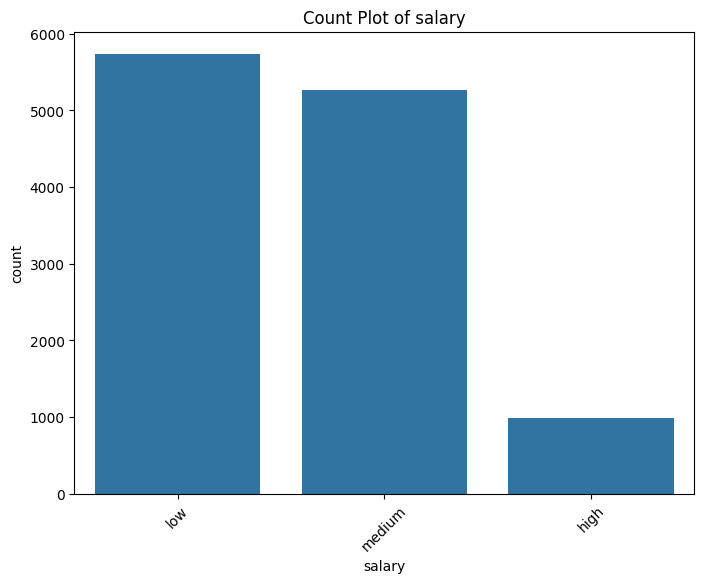

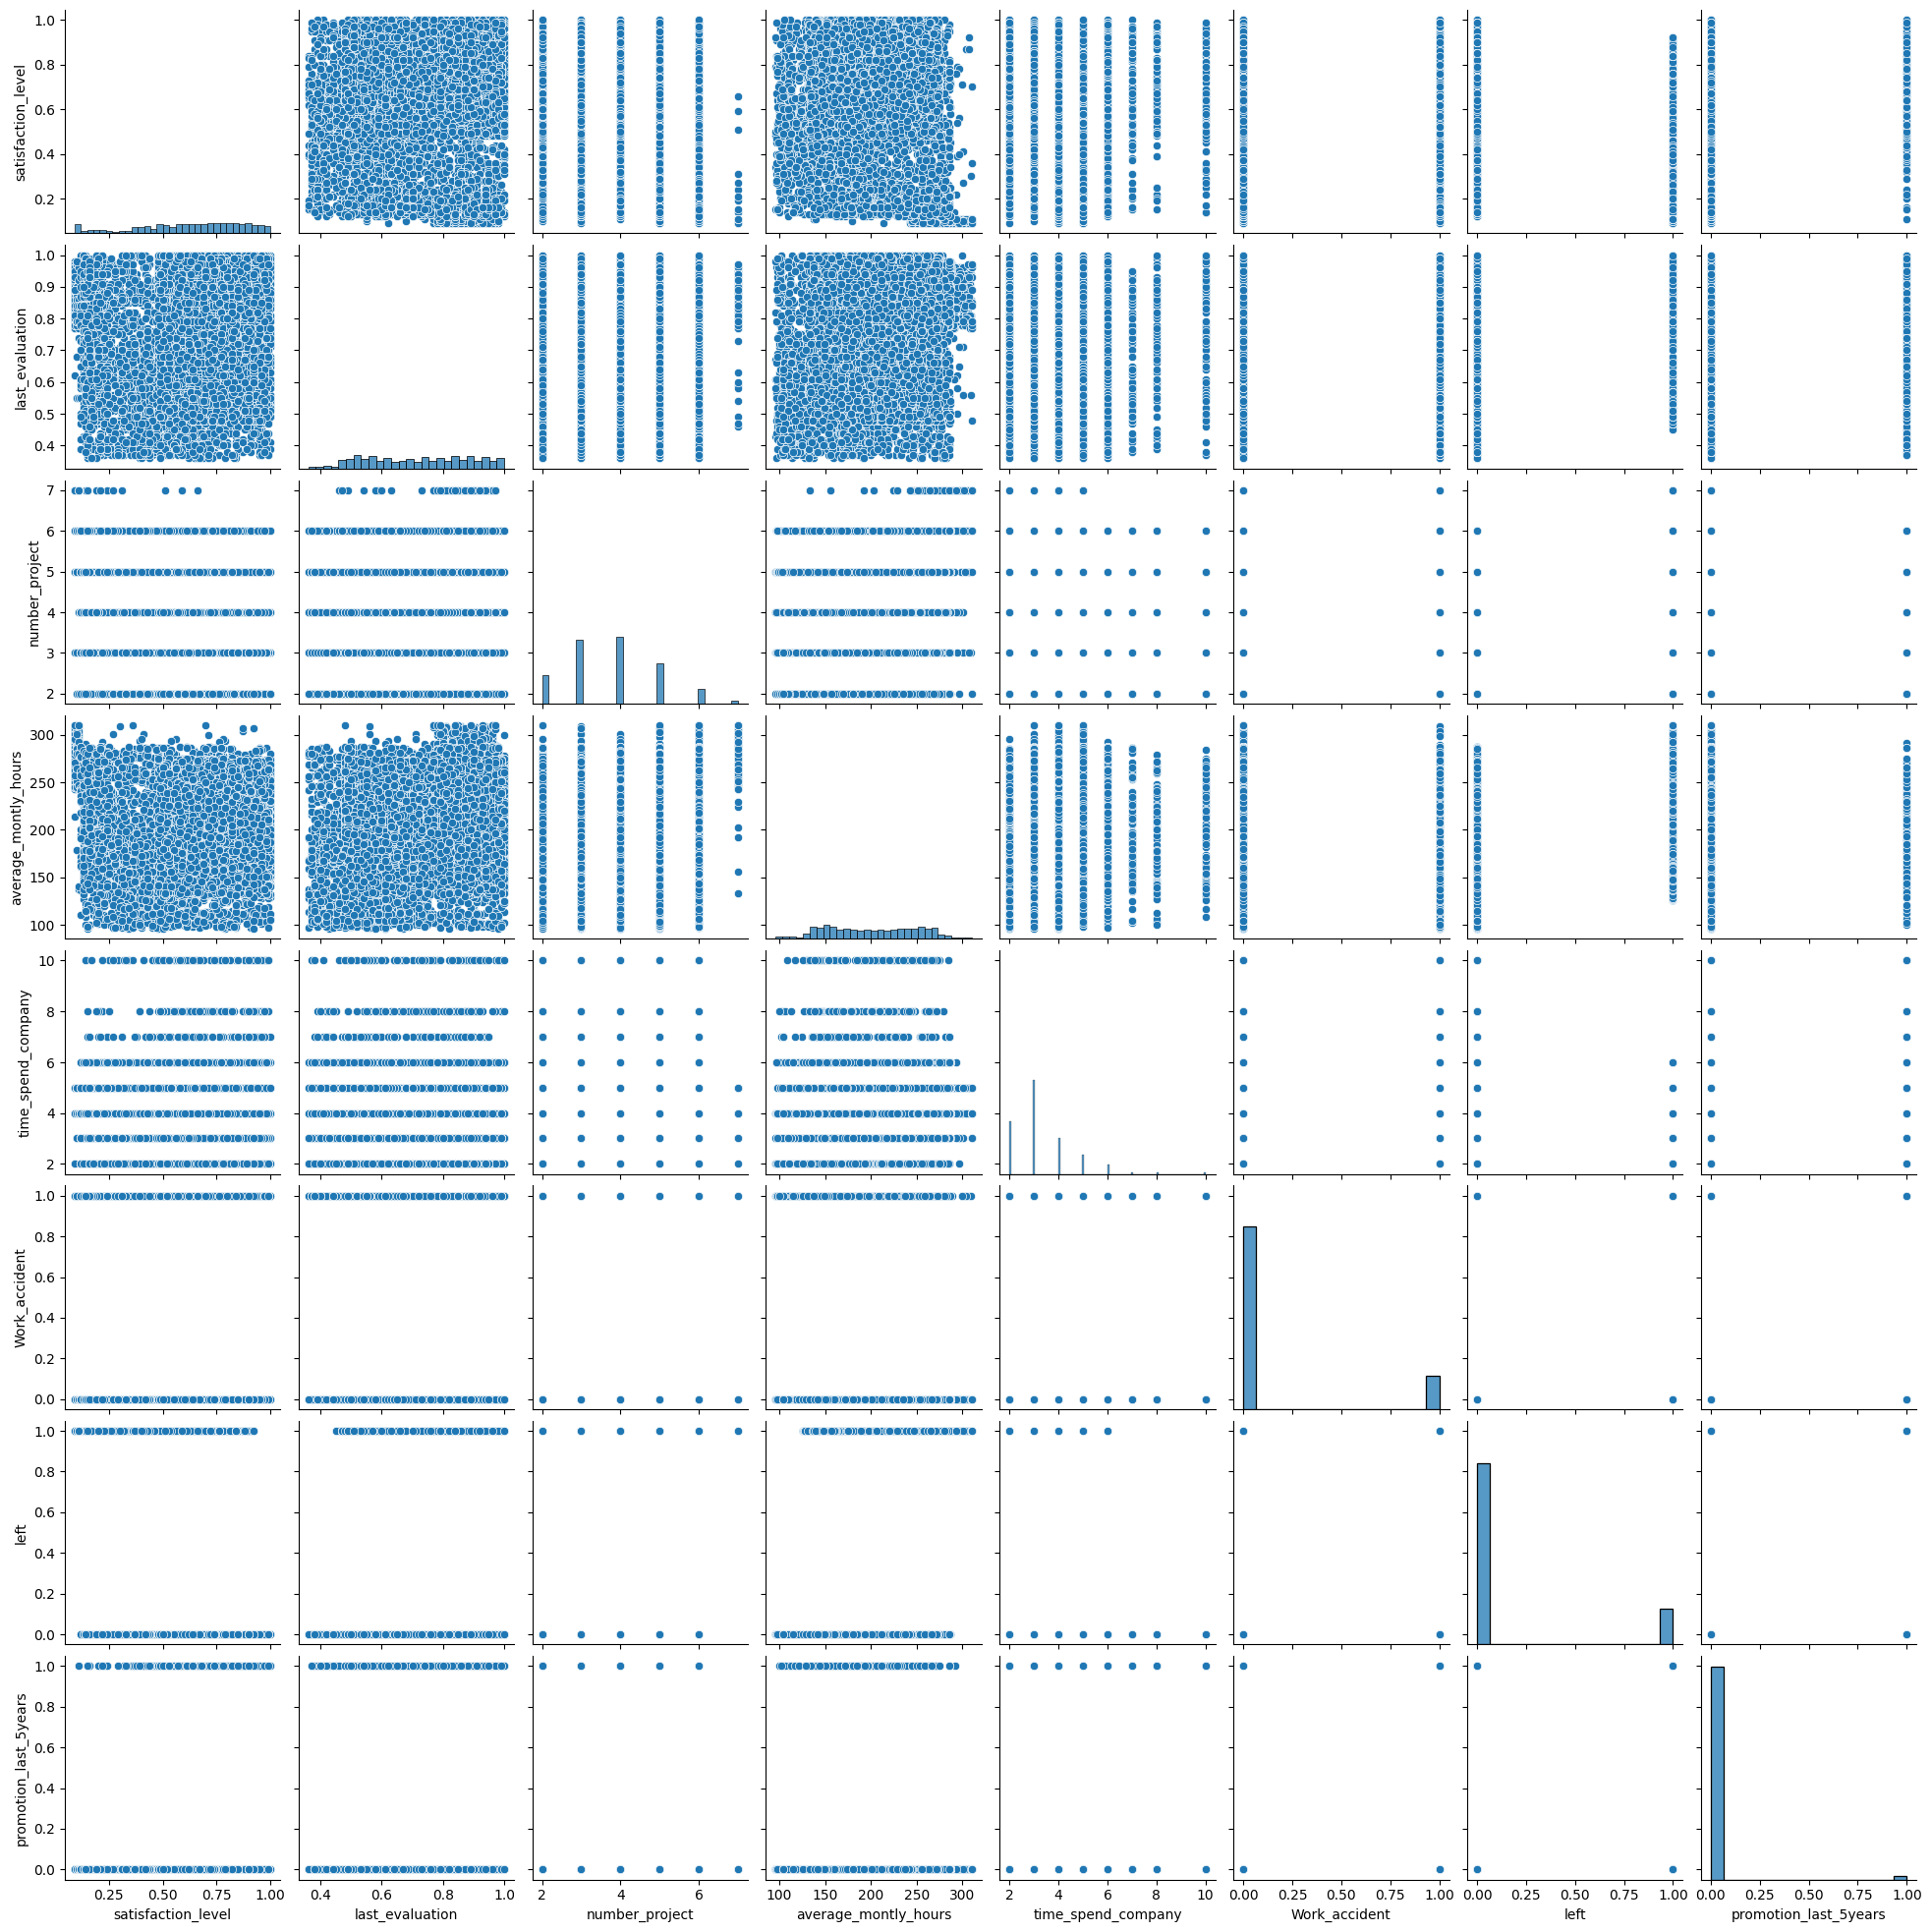

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame

# Histograms for numerical features
data.hist(figsize=(12, 8))
plt.show()

# Box plots for numerical features
data.plot(kind='box', subplots=True, layout=(3, 3), sharex=False, sharey=False, figsize=(12, 8))
plt.show()

# Correlation matrix
# Include only numerical features for correlation calculation
corr = data.select_dtypes(include=['number']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

# Count plots for categorical features
for col in data.select_dtypes(include=['object']):
  plt.figure(figsize=(8, 6))
  sns.countplot(x=col, data=data)
  plt.title(f'Count Plot of {col}')
  plt.xticks(rotation=45)
  plt.show()

# Scatter plots for relationships between numerical features
sns.pairplot(data)
plt.show()

In [ ]:
data_encoded

satisfaction_level  last_evaluation  number_project  \
2000                    2                2               2   
2001                    3                2               0   
2002                    1                2               3   
2003                    3                3               3   
2004                    2                1               1   
...                   ...              ...             ...   
11980                   3                3               2   
11985                   3                2               2   
11986                   2                1               3   
11987                   0                3               2   
11999                   2                2               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
2000                      3                   1              2     2   
2001                      2                   1              2     2   
2002                      2                   1              2     2   
2003                      3                   1              2     2   
2004                      3                   0              2     2   
...                     ...                 ...            ...   ...   
11980                     3                   4              2     2   
11985                     2                   1              2     2   
11986                     1                   3              2     2   
11987                     3                   3              2     2   
11999                     2                   1              2     2   

       promotion_last_5years  sales_IT  sales_RandD  ...  sales_hr  \
2000                       2     False        False  ...     False   
2001                       2     False        False  ...     False   
2002                       2     False        False  ...     False   
2003                       2     False        False  ...     False   
2004                       2     False        False  ...     False   
...                      ...       ...          ...  ...       ...   
11980                      2     False        False  ...     False   
11985                      2     False        False  ...     False   
11986                      2      True        False  ...     False   
11987                      2     False        False  ...     False   
11999                      2      True        False  ...     False   

       sales_management  sales_marketing  sales_product_mng  sales_sales  \
2000              False            False              False         True   
2001              False            False              False         True   
2002              False            False              False         True   
2003              False            False              False         True   
2004              False            False              False         True   
...                 ...              ...                ...          ...   
11980             False            False              False         True   
11985             False            False              False         True   
11986             False            False              False        False   
11987             False            False               True        False   
11999             False            False              False        False   

       sales_support  sales_technical  salary_high  salary_low  salary_medium  
2000           False            False        False        True          False  
2001           False            False        False        True          False  
2002           False            False        False        True          False  
2003           False            False        False        True          False  
2004           False            False        False        True          False  
...              ...              ...          ...         ...            ...  
11980          False            False        False       False           True  
119

# **>>Bar Graphs**

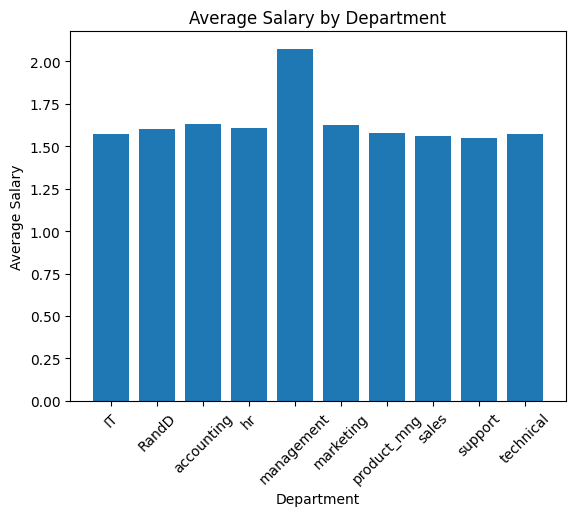

In [ ]:
#Bar chart for data file
import pandas as pd
import matplotlib.pyplot as plt

# Load the HR data (replace 'hr_data.csv' with your file)
hr_data = pd.read_csv('/content/HR.csv')

# Convert 'salary' column to numeric values
salary_mapping = {'low': 1, 'medium': 2, 'high': 3} # create a dictionary for mapping
hr_data['salary'] = hr_data['salary'].map(salary_mapping) # map the values

# Example: Bar chart of average salary by department
average_salary = hr_data.groupby('sales')['salary'].mean()

# Create bar chart
plt.bar(average_salary.index, average_salary.values)

# Add labels and title
plt.xlabel("Department")
plt.ylabel("Average Salary")
plt.title("Average Salary by Department")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the chart
plt.show()

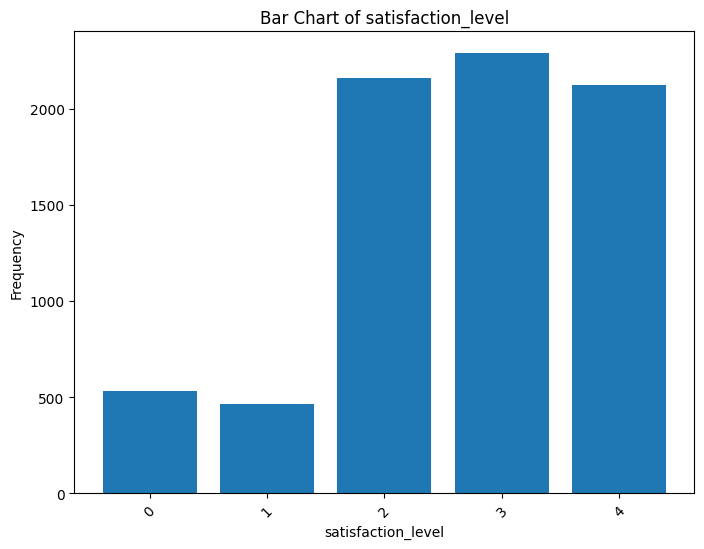

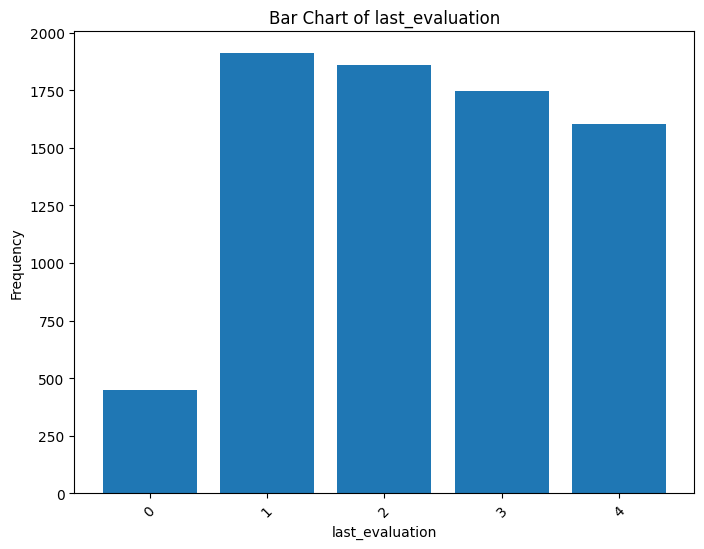

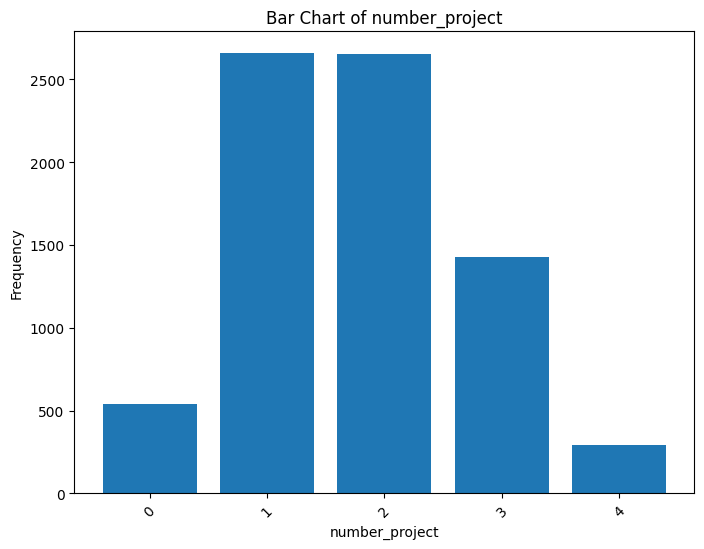

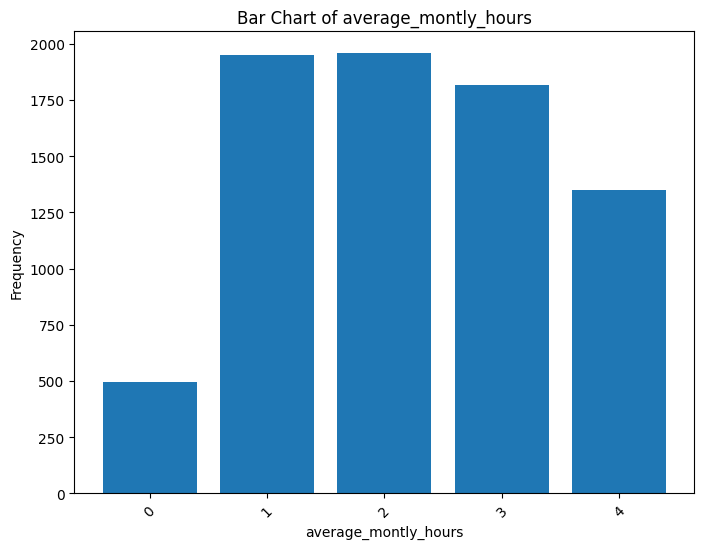

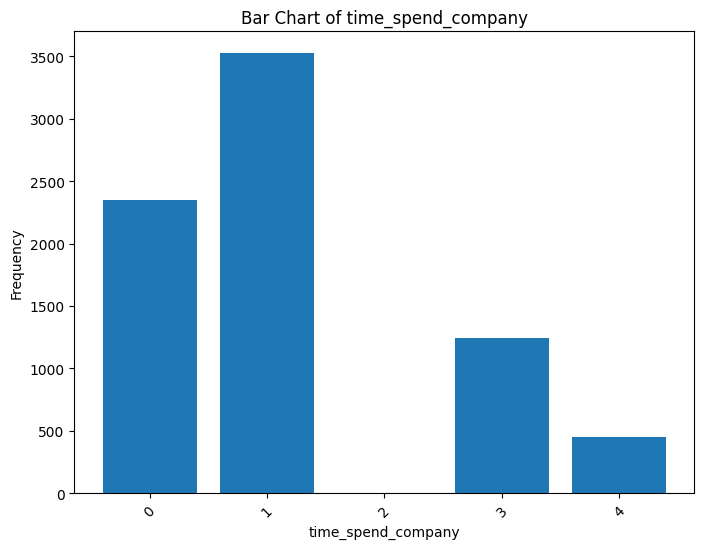

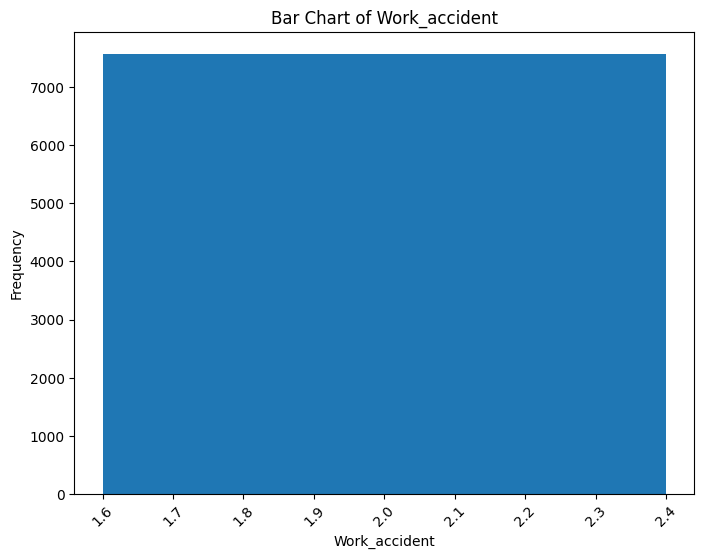

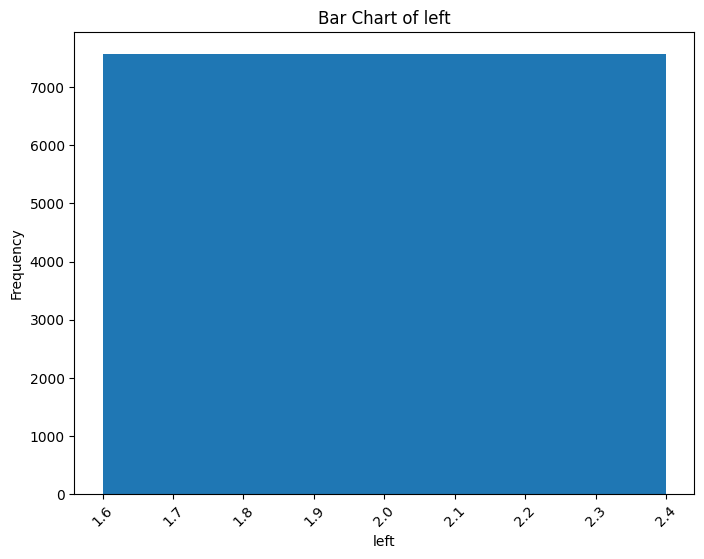

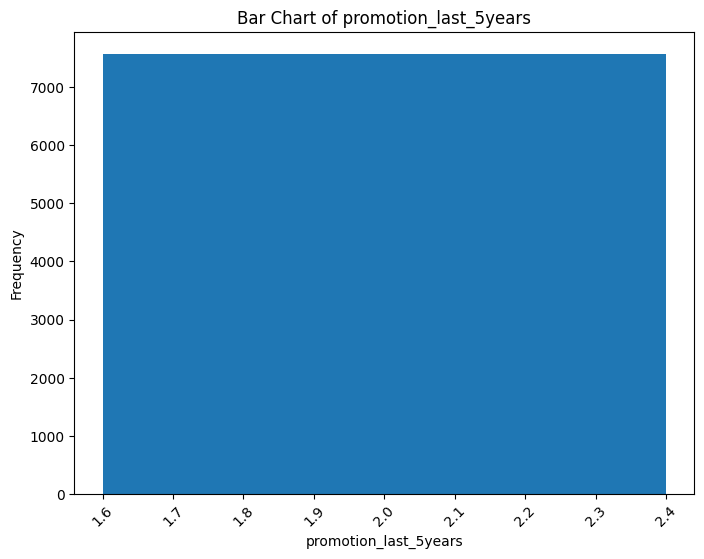

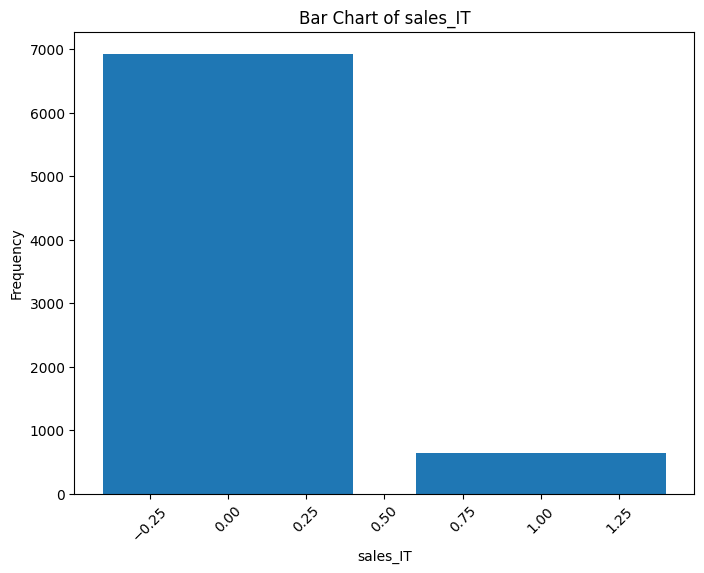

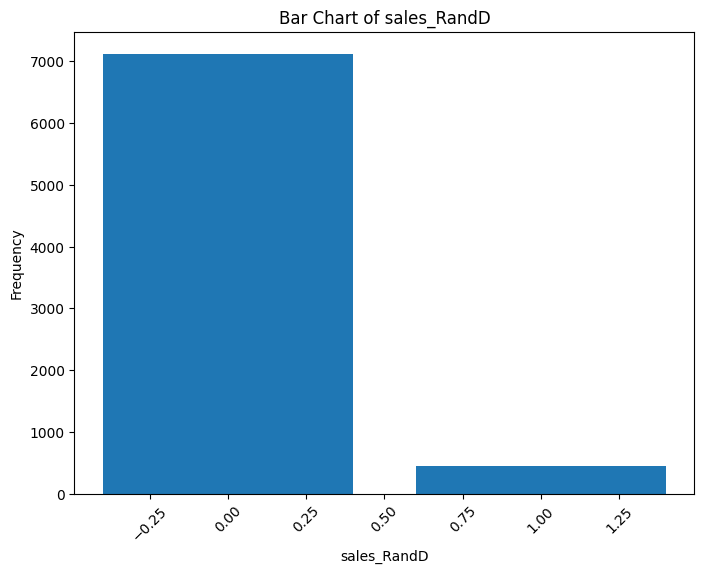

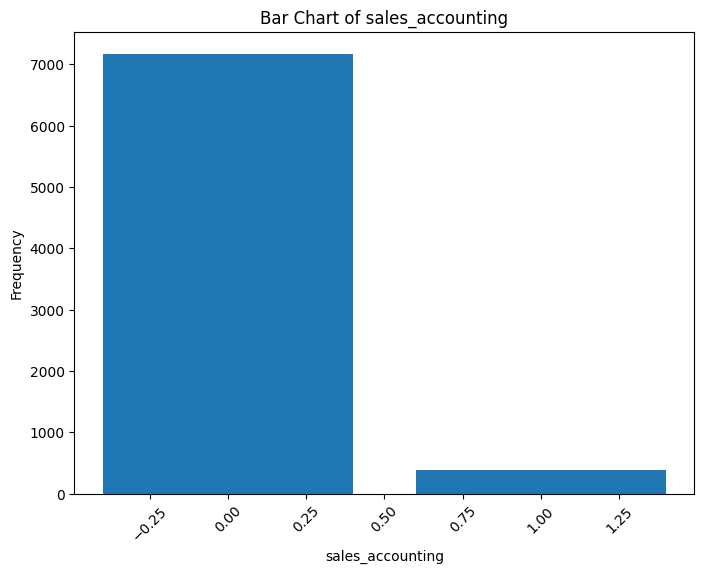

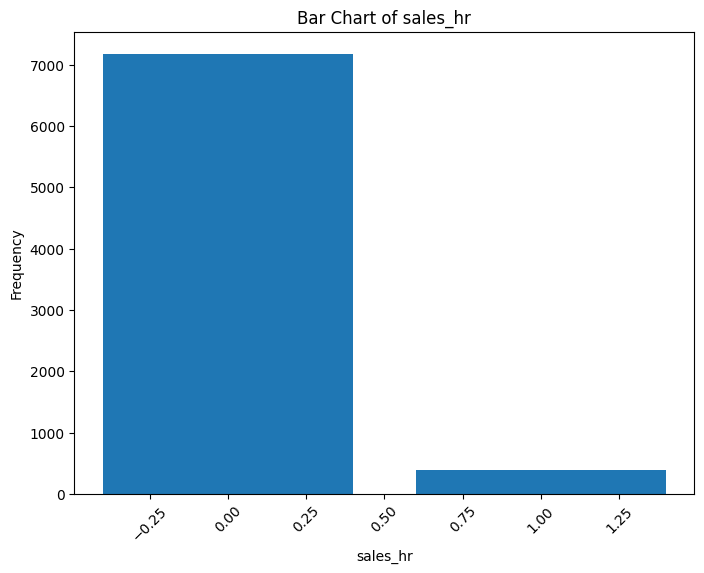

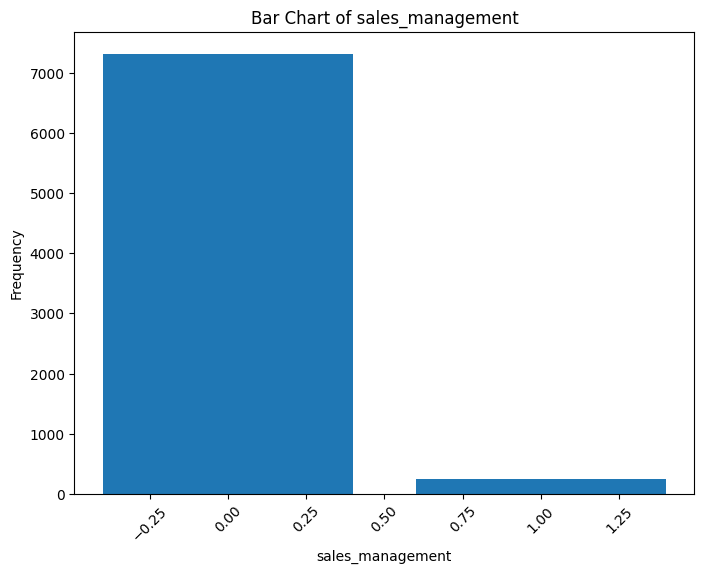

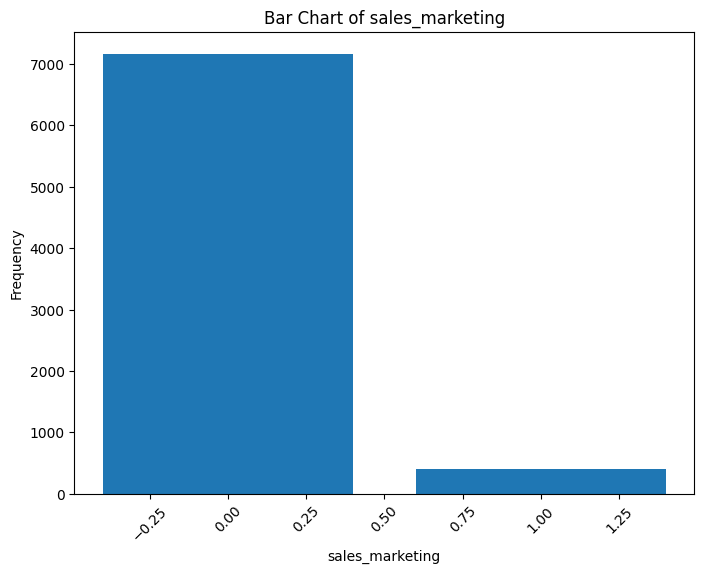

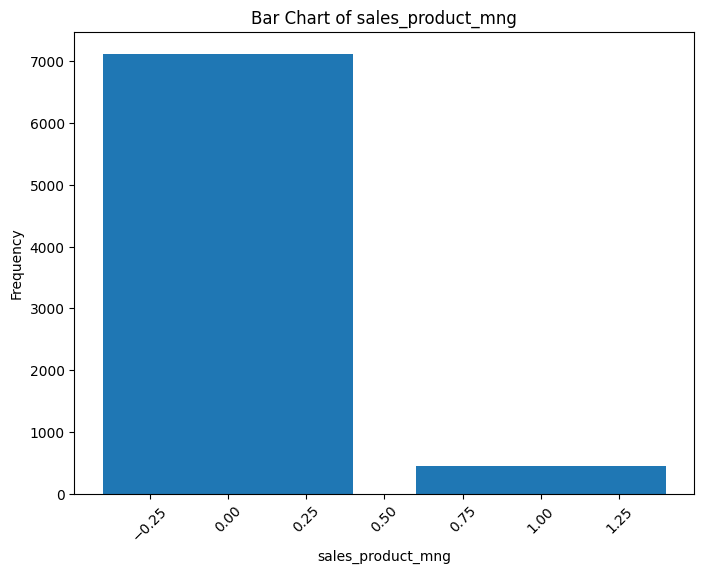

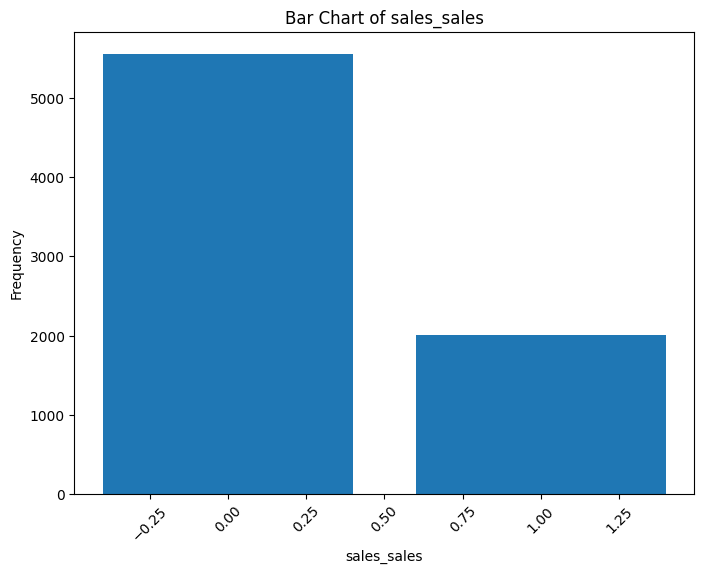

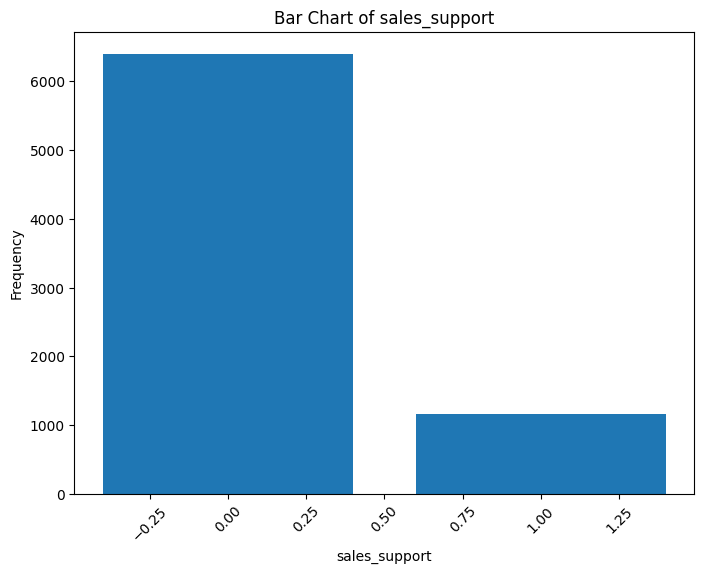

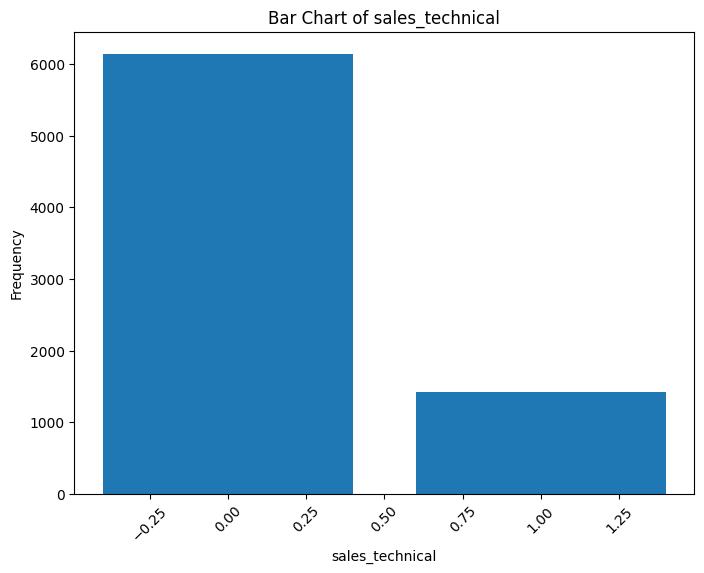

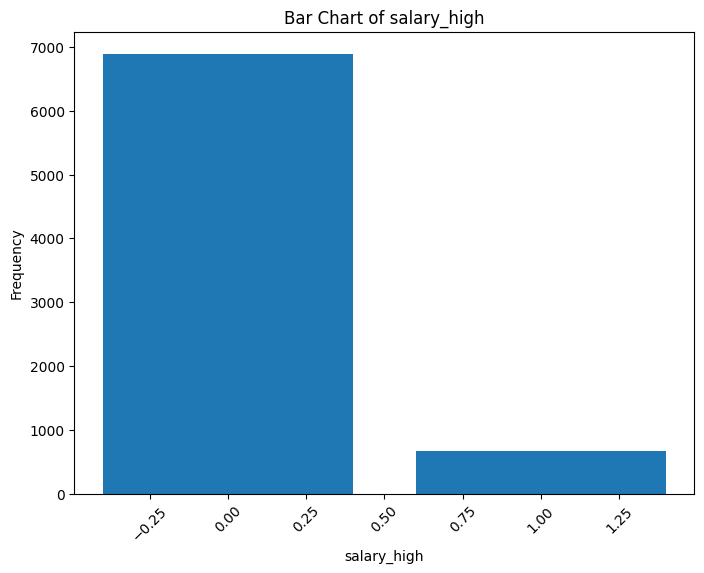

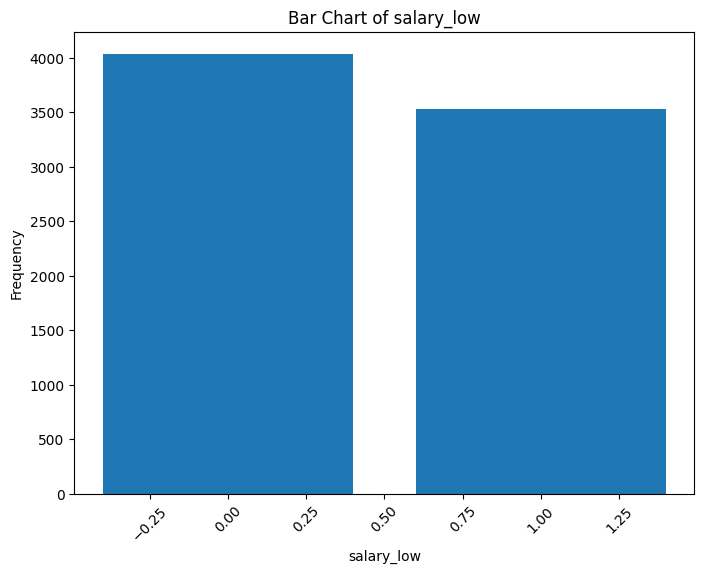

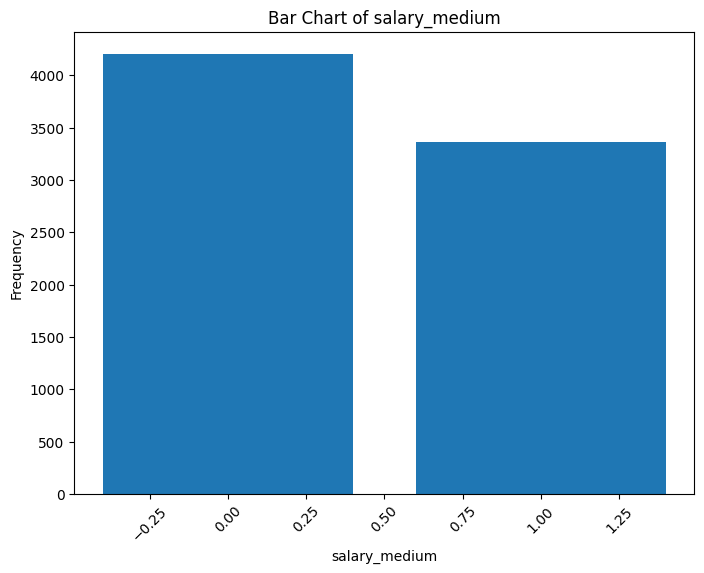

In [ ]:
#barchart for encoded file
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data_encoded' is your DataFrame with encoded categorical features

for col in data_encoded.columns:
  plt.figure(figsize=(8, 6))
  value_counts = data_encoded[col].value_counts()
  plt.bar(value_counts.index, value_counts.values)
  plt.title(f'Bar Chart of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.xticks(rotation=45)
  plt.show()

# **>>Heatmap**
A heatmap is like a colorful grid that shows how different things are related to each other. Imagine a table where the colors in the cells represent the values - the more intense the color, the stronger the relationship.




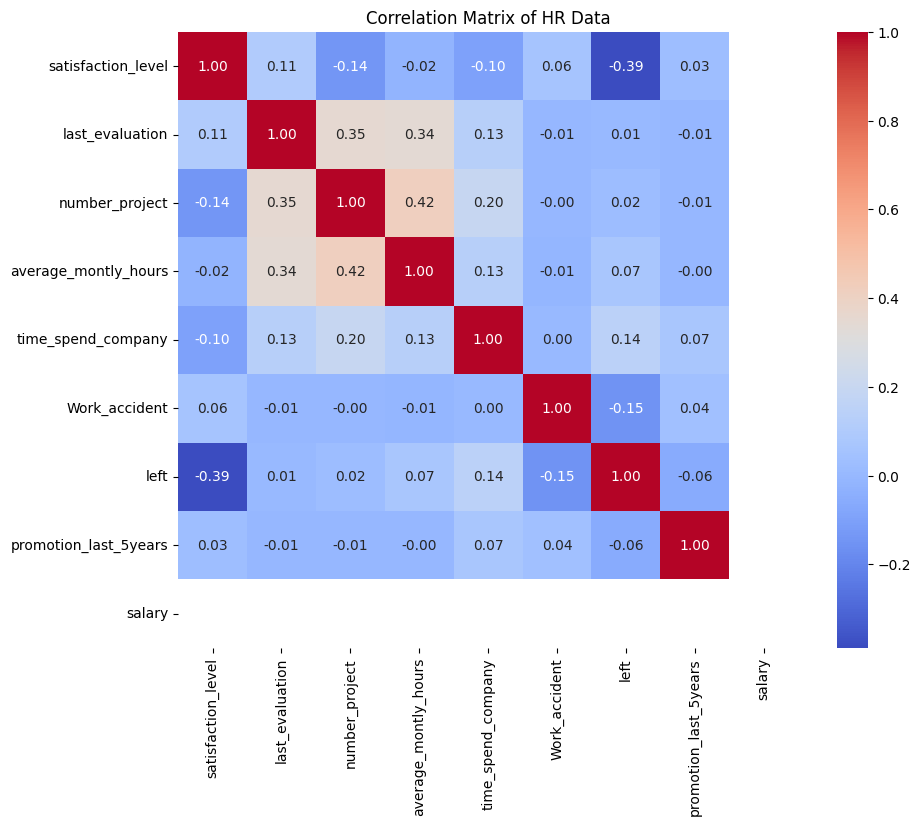

In [ ]:
#Heat map
# Convert 'salary' column to numeric values for correlation calculation
salary_mapping = {'low': 1, 'medium': 2, 'high': 3}
hr_data['salary'] = hr_data['salary'].map(salary_mapping)

# Calculate the correlation matrix
# Include only numerical features for correlation calculation
corr = hr_data.select_dtypes(include=['number']).corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of HR Data')
plt.show()

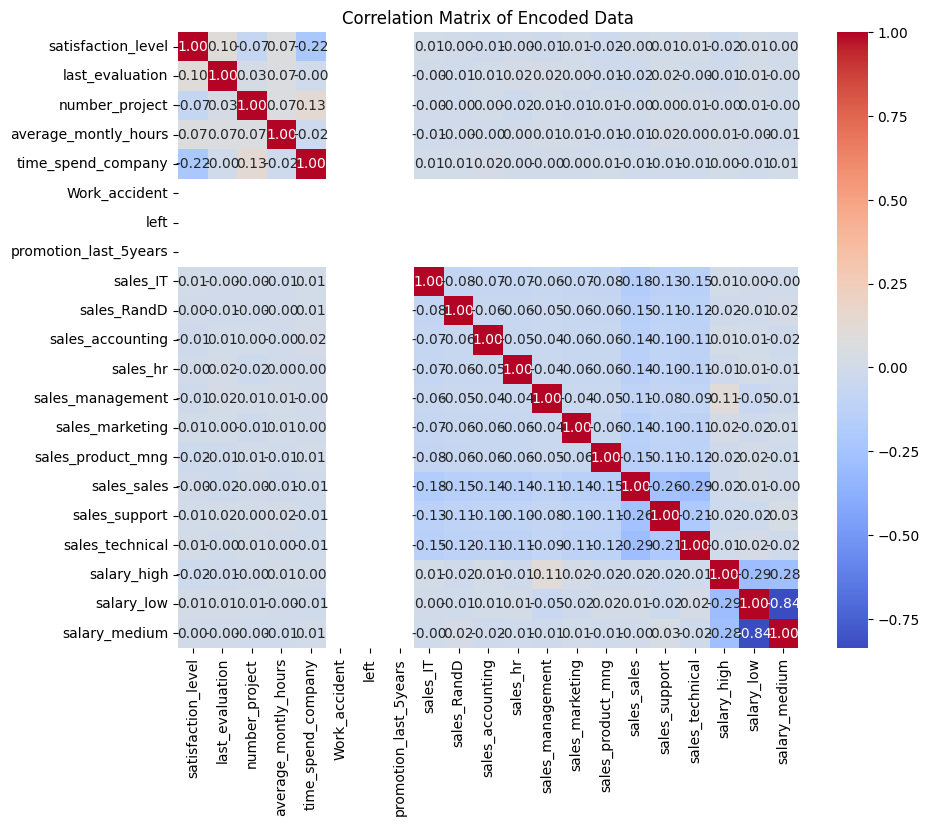

In [ ]:
#heatmap for encoded data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data_encoded' is your DataFrame with encoded categorical features

# Calculate the correlation matrix
corr = data_encoded.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Encoded Data')
plt.show()

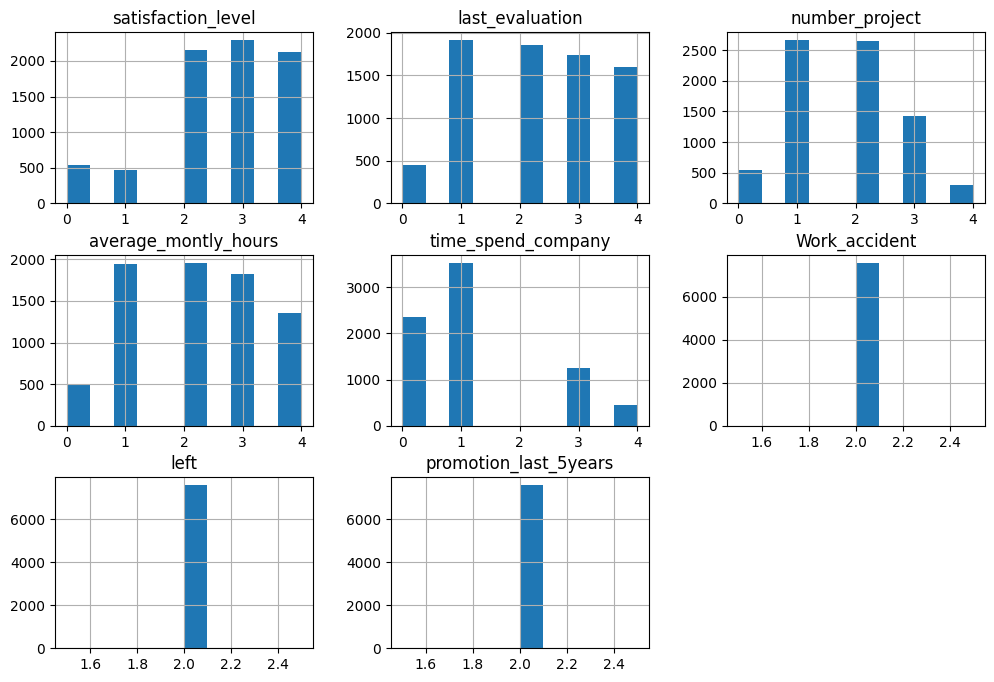

In [ ]:
#histogram for encoded data
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data_encoded' is your DataFrame with encoded categorical features

# Histograms for all features
data_encoded.hist(figsize=(12, 8))
plt.show()

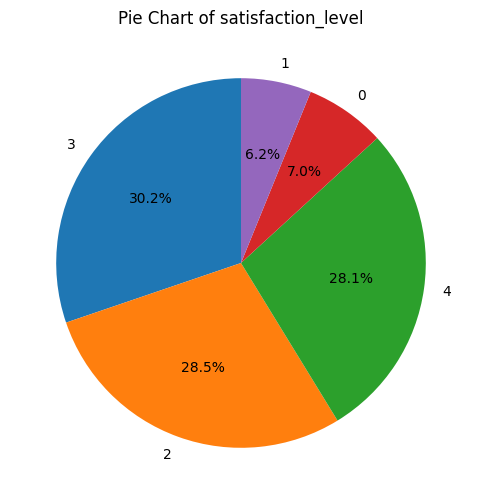

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data_encoded' is your DataFrame with encoded categorical features

# Choose a column for the pie chart
column_name = 'satisfaction_level' # Changed to the correct column name

# Calculate value counts
value_counts = data_encoded[column_name].value_counts() #Ensure that data_encoded contains the specified column

# Create pie chart
plt.figure(figsize=(8, 6))
plt.pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
plt.title(f'Pie Chart of {column_name}')
plt.show()

In [ ]:
!pip install squarify

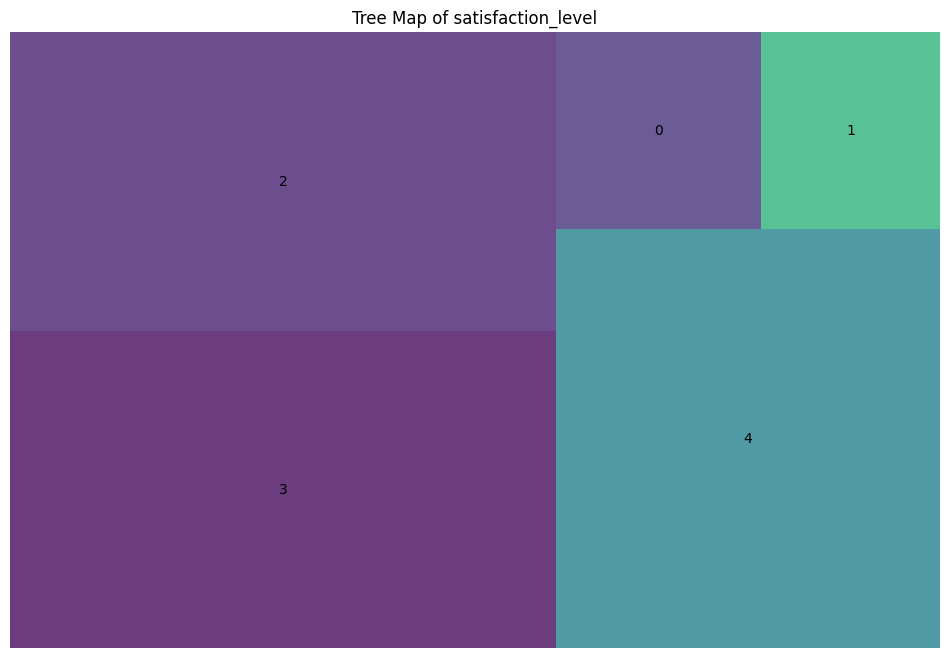

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import squarify

# Assuming 'data_encoded' is your DataFrame with encoded categorical features

# Choose a column for the tree map
column_name = 'satisfaction_level'  # Replace with the actual column name

# Calculate value counts
value_counts = data_encoded[column_name].value_counts()

# Create tree map
plt.figure(figsize=(12, 8))
squarify.plot(sizes=value_counts.values, label=value_counts.index, alpha=.8)
plt.title(f'Tree Map of {column_name}')
plt.axis('off')
plt.show()

Text(0, 0.5, 'Turnover')

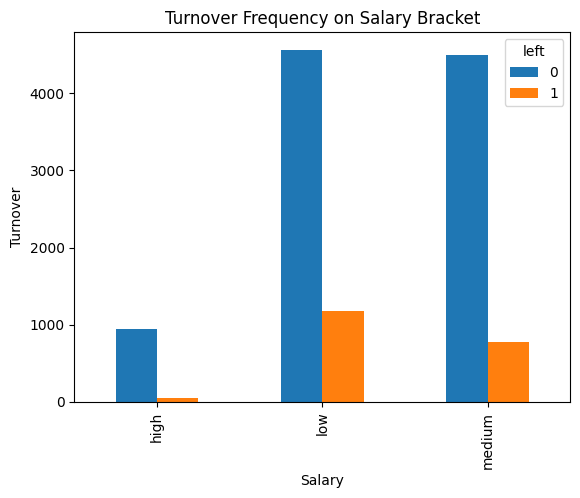

In [ ]:
pd.crosstab(data.salary,data.left).plot(kind='bar')
plt.title('Turnover Frequency on Salary Bracket')
plt.xlabel('Salary')
plt.ylabel('Turnover')

Text(0, 0.5, 'Turnover')

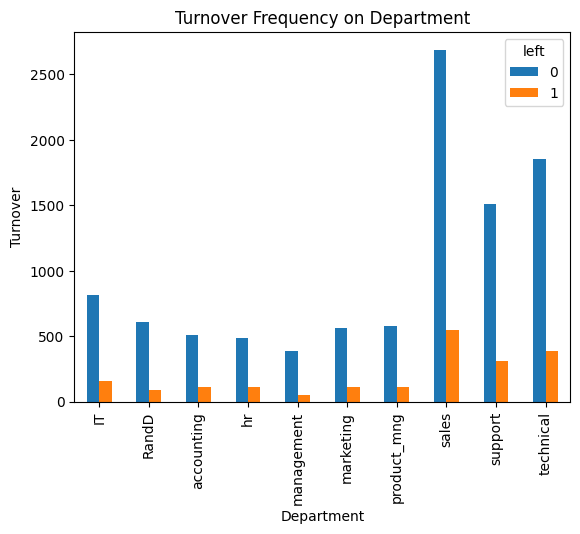

In [ ]:
pd.crosstab(data.sales,data.left).plot(kind='bar')
plt.title('Turnover Frequency on Department')
plt.xlabel('Department')
plt.ylabel('Turnover')

#**6.splittting & training**
Splitting data into training and testing sets before training a machine learning model is crucial for the following reasons:

**Evaluation:** The testing set, which the model hasn't seen during training, allows you to evaluate its performance on unseen data. This gives you a realistic estimate of how well your model will generalize to new data.

**Avoid Overfitting:** Overfitting occurs when a model learns the training data too well, including noise and irrelevant patterns. This leads to poor performance on new data. By evaluating on a separate test set, you can detect overfitting.

**Model Selection:** You can use the testing set to compare the performance of different models or different hyperparameter settings and choose the best one.

In essence, splitting and training ensures that you build a model that can accurately predict outcomes on new, unseen data, rather than just memorizing the training data.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Assuming 'data' is your original DataFrame and 'target_column' is the name of your target variable column

X = data_encoded.drop('left', axis=1)  # Assuming 'left' is the target variable
y =data_encoded['left']
# Encode categorical features in X
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le  # Store encoders for later use

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust test_size and random_state as needed

# Now you have X_train, X_test, y_train, y_test ready for model training

In [ ]:
!pip install graphviz

#**7.Interactive Decision Tree Classfier**

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
from ipywidgets import interactive, IntSlider, FloatSlider, interact
import ipywidgets
from IPython.display import display, Image
from subprocess import call
import matplotlib.image as image
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source

# **>>Decision tree classifier**

This code defines an interactive function plot_tree that allows you to explore different parameters of a decision tree classifier and visualize the resulting tree. It uses ipywidgets to create interactive sliders for parameters like crit, split, depth, min_split, and min_leaf. The function trains a DecisionTreeClassifier with the specified parameters, prints the training and test accuracy, and displays the confusion matrices. Finally, it generates a visual representation of the decision tree using graphviz and displays it as an SVG image.

In [ ]:
@interact
def plot_tree(crit=['gini','entropy'],
             split=['best','random'],
             depth = IntSlider(min = 1 ,max = 50 ,value = 2 ,continous_update = False ),
             min_split = IntSlider(min = 2 ,max = 5 ,value = 2 ,continous_update = False),
             min_leaf = IntSlider(min = 1 ,max = 5 ,value = 1 ,continous_update = False)):
    classifier=DecisionTreeClassifier(random_state=0,
                                     criterion=crit,
                                     splitter=split,
                                     max_depth=depth,
                                     min_samples_leaf=min_leaf,
                                     min_samples_split=min_split)
    classifier.fit(X_train,y_train)
    train_pred=classifier.predict(X_train)
    test_pred=classifier.predict(X_test)
    print("Decision Tree Training Accuracy : {:.2f}%".format(accuracy_score(y_train,train_pred)*100))
    print("Decision Tree Test Accuracy : {:.2f}%".format(accuracy_score(y_test,test_pred)*100))
    from sklearn.metrics import confusion_matrix
    print("\nConfusion Matrix for Test Data :")
    print(confusion_matrix(y_test,test_pred))
    print("\nConfusion Matrix for Training Data :")
    print(confusion_matrix(y_train,train_pred))

    from sklearn.tree import export_graphviz
    from sklearn import tree
    from IPython.display import SVG
    from graphviz import Source

    graph=Source(tree.export_graphviz(classifier,out_file=None,feature_names=X_train.columns,
                                      class_names=['Stayed','left'], # Replace with your class names
                                      filled=True))
    display(SVG(graph.pipe(format = 'svg')))

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

# **>>Random Forest Classifier**
The Random Forest Classifier is a powerful machine learning algorithm used for both classification and regression tasks. It operates by constructing multiple decision trees during training and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

In [ ]:
@interact
def random_forest(crit=['gini','entropy'],
                 bootstrap=True,
                 depth=IntSlider(min=1,max=30,value=5,continous_update=False),
                 forest=IntSlider(min=1,max=200,value=50,continous_update=False),
                 min_split=IntSlider(min=2,max=5,value=2,continous_update=False),
                 min_leaf=IntSlider(min=1,max=5,value=2,continous_update=False),):
    forest_classifier= RandomForestClassifier(random_state=1,
                                             bootstrap=bootstrap,
                                             n_estimators=forest,
                                             max_depth=depth,
                                             min_samples_split=min_split,
                                             min_samples_leaf=min_leaf,
                                             n_jobs=-1)
    forest_classifier.fit(X_train,y_train)
    train_pred=forest_classifier.predict(X_train)
    test_pred=forest_classifier.predict(X_test)
    print("Random Forest Training Accuracy : {:.2f}%".format(accuracy_score(y_train,train_pred)*100))
    print("Random Forest Test Accuracy : {:.2f}%".format(accuracy_score(y_test,test_pred)*100))
    from sklearn.metrics import confusion_matrix
    print("\nConfusion Matrix for Test Data :")
    print(confusion_matrix(y_test,test_pred))
    print("\nConfusion Matrix for Training Data :")
    print(confusion_matrix(y_train,train_pred))

    #plotting a tree from the Forest

    # Assuming 'forest_classifier' is your trained RandomForestClassifier and 'X_train' is your training data
    tree_n = forest_classifier.estimators_[0]  # Select the first tree in the forest # This line was moved inside the function

    # Export the tree to a DOT format
    dot_data = export_graphviz(tree_n,
                               out_file=None,
                               feature_names=X_train.columns,
                               class_names=['Stayed', 'left'], # Replace with your class names
                               filled=True,
                               rounded=True,
                               special_characters=True)

    # Create a graph from the DOT data
    graph = Source(dot_data)

    # Display the graph in the notebook
    display(SVG(graph.pipe(format='svg')))

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Checkbox(value=…

# **>>Another way to train the model if accuracy is less**



In [ ]:
# Assuming you want to use a DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier() # Create a DecisionTreeClassifier object and assign it to clf
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_preds=clf.predict(X_test)
y_preds

array([2, 2, 2, ..., 2, 2, 2])

# **8.Eveluate model on training data and test data**

In [ ]:
#Eveluate model on training data and test data
clf.score(X_train,y_train)

1.0

In [ ]:
clf.score(X_test,y_test)

1.0

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           2       1.00      1.00      1.00      1514

    accuracy                           1.00      1514
   macro avg       1.00      1.00      1.00      1514
weighted avg       1.00      1.00      1.00      1514



In [ ]:
#If accuracy of model is less than 0.75 improve model
#clumsy example,there are better inbuilt methods
#try different amount of n_estimators

In [ ]:
import numpy as np
np.random.seed(42)
for i in range(10,100,10):
  print(f"Trying model with {i} estimators...")
  clf=RandomForestClassifier(n_estimators=i).fit(X_train,y_train)
  print(f"Model accuracy on test set:{clf.score(X_test,y_test)*100:.2f}%")
  print("")

Trying model with 10 estimators...
Model accuracy on test set:100.00%

Trying model with 20 estimators...
Model accuracy on test set:100.00%

Trying model with 30 estimators...
Model accuracy on test set:100.00%

Trying model with 40 estimators...
Model accuracy on test set:100.00%

Trying model with 50 estimators...
Model accuracy on test set:100.00%

Trying model with 60 estimators...
Model accuracy on test set:100.00%

Trying model with 70 estimators...
Model accuracy on test set:100.00%

Trying model with 80 estimators...
Model accuracy on test set:100.00%

Trying model with 90 estimators...
Model accuracy on test set:100.00%



In [ ]:
#compute confusion matrix in evaluate the accuracy of a classification
confusion_matrix(y_test,y_preds)

array([[1514]])

In [ ]:
accuracy_score(y_test,y_preds)

1.0

In [ ]:
#Save a model and load it
import pickle
pickle.dump(clf,open("random_forest_model_1.pkl","wb"))
loaded_model=pickle.load(open("random_forest_model_1.pkl","rb"))
loaded_model.score(X_test,y_test)

1.0

#**9.Deploy the model**

Model deployment is the process of making your trained machine learning model available for use in real-world applications. It's the crucial step that allows your model to make predictions on new data and provide value.

In [ ]:
from sklearn.model_selection import cross_val_score
np.random.seed(42)
for i in range(100,200,10):
  print(f"Trying model with {i} estimators...")
  model=RandomForestClassifier(n_estimators=i).fit(X_train,y_train)
  print(f"Model accuracy on test set:{model.score(X_test,y_test)*100:.2f}%")
  #measure the mean cross validation score across different train and test spilits
  cross_val_mean=np.mean(cross_val_score(model,X,y,cv=5))
  print(f"5-fold Cross-validation score: {cross_val_mean*100:.2f}%")
  print("")

Trying model with 100 estimators...
Model accuracy on test set:100.00%
5-fold Cross-validation score: 100.00%

Trying model with 110 estimators...
Model accuracy on test set:100.00%
5-fold Cross-validation score: 100.00%

Trying model with 120 estimators...
Model accuracy on test set:100.00%
5-fold Cross-validation score: 100.00%

Trying model with 130 estimators...
Model accuracy on test set:100.00%
5-fold Cross-validation score: 100.00%

Trying model with 140 estimators...
Model accuracy on test set:100.00%
5-fold Cross-validation score: 100.00%

Trying model with 150 estimators...
Model accuracy on test set:100.00%
5-fold Cross-validation score: 100.00%

Trying model with 160 estimators...
Model accuracy on test set:100.00%
5-fold Cross-validation score: 100.00%

Trying model with 170 estimators...
Model accuracy on test set:100.00%
5-fold Cross-validation score: 100.00%

Trying model with 180 estimators...
Model accuracy on test set:100.00%
5-fold Cross-validation score: 100.00%

T

# **10.Prediction based on feedback data**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Sample data - replace with your actual data
data = {
    'features': ['High workload', 'Low salary', 'Lack of growth', 'Toxic environment', 'Good work-life balance'],
    'prediction': [1, 1, 1, 0, 0],  # 1 for likely to leave, 0 for likely to stay
    'feedback': ['Agree', 'Agree', 'Disagree', 'Agree', 'Disagree']
}

# Create a DataFrame
feedback_df = pd.DataFrame(data)

# Combine features and feedback for richer input data
feedback_df['combined'] = feedback_df['features'] + ' - ' + feedback_df['feedback']

# Prepare the data for training
X = feedback_df['combined']
y = feedback_df['prediction']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text data to numerical representation using TF-IDF
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Function to predict employee attrition and provide suggestions
def predict_attrition_and_suggest(feedback, model, vectorizer):
  """
  Predicts employee attrition based on feedback and provides suggestions.

  Args:
    feedback: The employee feedback.
    model: The trained machine learning model.
    vectorizer: The TF-IDF vectorizer used for text processing.

  Returns:
    A tuple containing the prediction (0 or 1) and a suggestion string.
  """
  # Transform the feedback using the trained vectorizer
  feedback_vec = vectorizer.transform([feedback])
  # Predict the likelihood of leaving
  prediction = model.predict(feedback_vec)[0]

  if prediction == 1:
    suggestion = "HR should address this concern immediately. Consider offering growth opportunities, improving work conditions, or adjusting compensation."
  else:
    suggestion = "This is a positive sign! Continue fostering a positive environment and address any potential issues proactively."

  return prediction, suggestion

# Example usage
new_feedback = "High workload - Agree"
prediction, suggestion = predict_attrition_and_suggest(new_feedback, model, vectorizer)

print(f"Prediction: {prediction}")  # 0 for likely to stay, 1 for likely to leave
print(f"Suggestion: {suggestion}")

Prediction: 1
Suggestion: HR should address this concern immediately. Consider offering growth opportunities, improving work conditions, or adjusting compensation.


#**11.Conclusion**

This project explored the development of a predictive model for employee turnover using a Random Forest Classifier. By leveraging historical employee data and applying machine learning techniques, we aimed to identify patterns and predict potential employee departures.

The process involved data preprocessing, feature engineering, model training, and evaluation. While the initial model demonstrated promising accuracy, further enhancements can be explored to improve its performance and generalizability.